In [5]:
# Importando a biblioteca Pandas e definindo a variável 'dataset' como o path para a database.

import pandas as pd

dataset = pd.read_csv('/content/MKT.csv')

# Análise descritiva

In [ ]:
# Puxando as 5 primeiras linhas da planilha para visualizar as colunas e a distribuição dos dados.

dataset.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Utilizando .info para ter um diagnóstico geral da planilha (nulos, valores duplicados, etc)

dataset.info()
dataset.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


,0
0,False
1,False
2,False
3,False
4,False
...,...
166,False
167,False
168,False
169,False


A partir do resultado do .info(), é possível ver que o dataset não possui valores nulos, ausentes e nem duplicados. O tipo de dado está correto (float64), dessa forma, é válido utilizar o .describe() para ter um panorama geral.

In [ ]:
dataset.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


 Os dados evidenciados pelo .describe() mostram um desvio padrão relativamente elevado para as colunas 'youtube', 'facebook' e 'newspaper' podendo indicar
 uma estratégia de investimento mais dinâmica ou possivelmente ser um reflexo da sazonalidade do mercado e das campanhas de publicidade.

 A coluna 'sales' não apresenta uma desvio padrão tão elevado quanto as outras, indicando que o valor das vendas é mais estável ao longo do intervalo presente no dataset.

# Análise exploratória

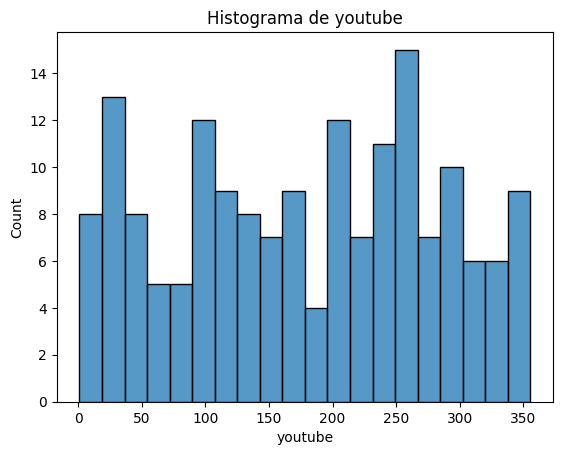

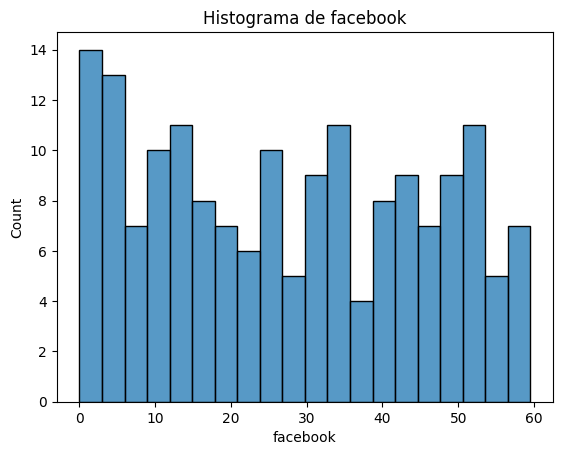

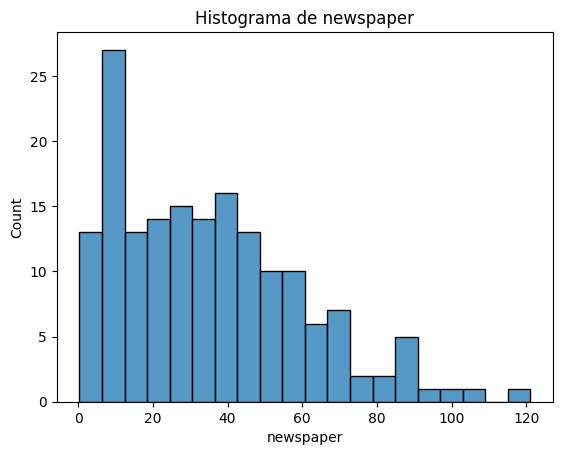

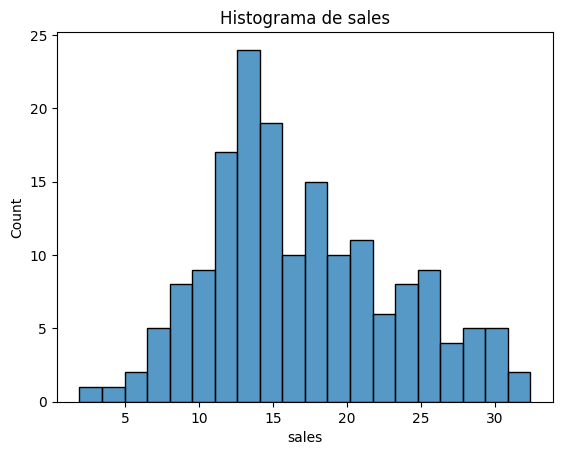

In [54]:
# Importando Seaborn e Matplotlib para plotar o histograma e analisar a distribuição dos valores:

import seaborn as sns
import matplotlib.pyplot as plt

for d in dataset.columns:
  plt.figure()
  sns.histplot(data = dataset[d], bins = 20)
  plt.title(f"Histograma de {d}")

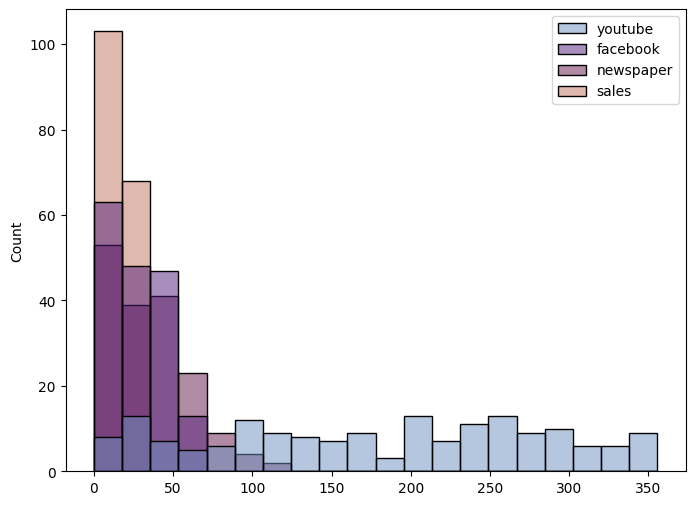

In [ ]:
# Plotando o histograma geral com as quatro colunas evidenciadas em cores diferentes em um único gráfico:

plt.figure(figsize=(8,6))
sns.histplot(data = dataset, bins = 20, palette = 'twilight');

# Análise dos Histogramas:

A partir dos histogramas é possível notar que os investimentos no canal 'facebook' e 'newspaper' estão mais concentrados no início do gráfico, indicando que a maior parte dos investimentos é de um valor mais reduzido.

Da mesma forma é possível notar que a coluna 'sales' tem o seu maior pico logo no ínicio do eixo X, assim como os seus demais picos, indicando também que o valor de 'sales' costuma ser um valor pequeno.

A coluna 'sales' também apresenta os menores valores do dataset, tendo um valor máximo de 32.

 A coluna 'youtube' se estende até o final do eixo X, indicando que os investimentos no canal são de valor mais elevado quando comparado com os canais 'facebook' e 'newspaper'. A coluna apresenta uma distribuição com varios picos no decorrer do eixo X.

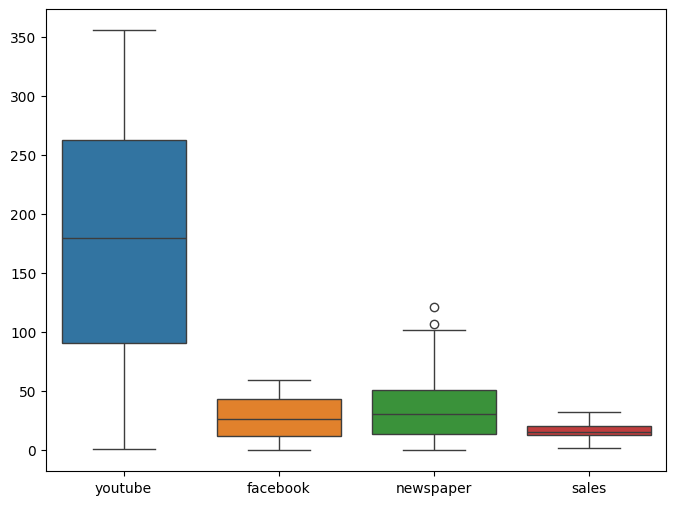

In [ ]:
# Plotando boxplot para comparar a distribuição e corroborar o histograma:

plt.figure(figsize = (8, 6))
sns.boxplot(data = dataset);

# Análise do Boxplot:

A análise do boxplot indica que o canal 'youtube' recebe investimentos mais altos (posição da mediana) e o tamanho da caixa indica uma variabilidade elevada de valores e o tamanho dos bigodes demonstra a presença de investimentos ainda mais altos e também de investimentos baixos, como foi observado no histograma.

O tamanho da caixa da coluna 'facebook' indica baixa variabilidade de valores, assim como a sua mediana e o tamanho dos bigodes demonstra que os valores costumam ser menos elevados.

A têndencia central da coluna 'facebook' também se mantém para a coluna 'newspaper' apesar de que esse canal demonstra uma caixa um pouco maior (indicando uma maior variação de valores) e bigode superior muito extendido com a presença de outliers, demonstrando a presença de investimentos atipicamente altos em algum período.

A coluna 'sales' apresenta a menor caixa e bigodes de tamanho similar, indicando pouca variabilidade de valores e sua mediana aponta para valores mais baixos.

In [ ]:
# Criando a matriz de correlação do dataset:

datasetCorr = dataset.corr()


,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


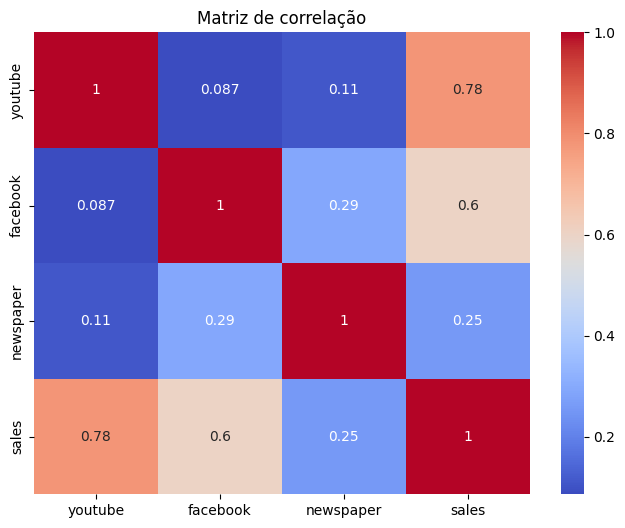

In [ ]:
# Heatmap evidenciando gráficamente a correlação entre as colunas:

plt.figure(figsize = (8, 6))
sns.heatmap(data = datasetCorr, annot = True, cmap = 'coolwarm')
plt.title('Matriz de correlação');

Text(0.5, 1.02, 'Pair Plot das Variáveis')

<Figure size 600x400 with 0 Axes>

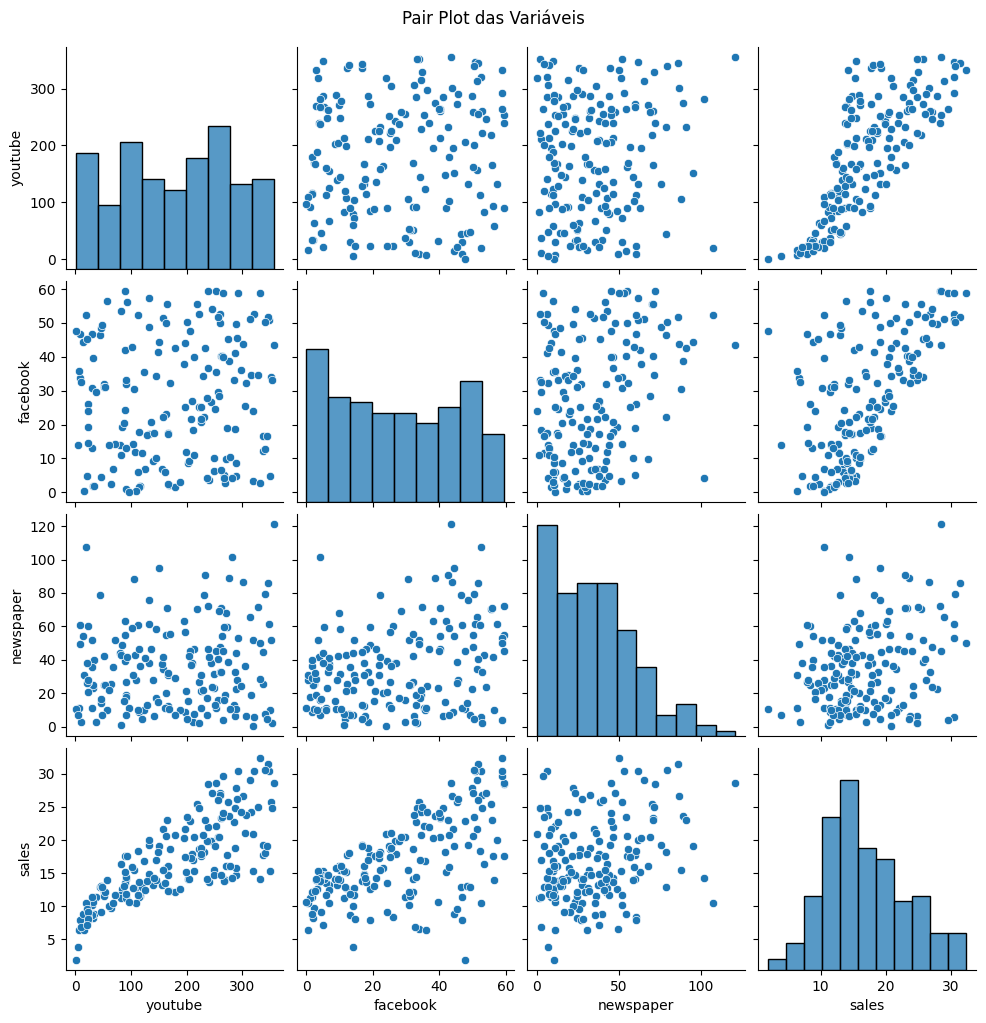

In [ ]:
# Pairplots para corroborar os achados do heatmap:

plt.figure(figsize = (6,4))
sns.pairplot(data = dataset)
plt.suptitle('Pair Plot das Variáveis', y=1.02)

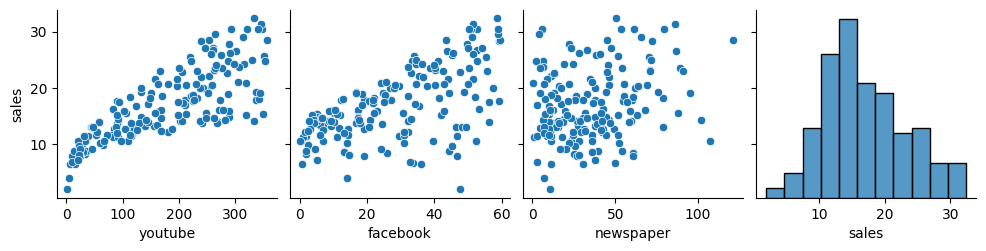

In [ ]:
# Pairplot isolado da coluna 'sales' no eixo y:

sns.pairplot(data = dataset, x_vars = ['youtube', 'facebook', 'newspaper', 'sales'], y_vars=['sales'])

# Análise de correlação a partir do Heatmap e Pairplots:

É possível perceber pela análise do heatmap e dos pairplots uma nítida correlação linear positiva entre a coluna 'youtube' e a coluna 'sales', demonstrada no valor do coeficiente de correlação de 0.78 e na clara tendência superior direita apresentada no scatterplot.

Da mesma forma, é possível observar essa correlação entre o canal 'facebook' e 'sales', ainda que de forma mais amena. O coeficiente de correlação é moderado (0.6) e o scatterplot é levemente mais randomizado, mas a tendência continua clara.

Curiosamente, a análise de correlação mostra um coeficiente fraco para 'newspaper' e 'sales' no valor de 0.25 e um scatterplot evidentemente randomizado, sem uma tendência clara, ao mesmo tempo que o canal 'newspaper' apresenta investimentos maiores que o canal 'facebook', levantando o questionamento da eficácia da estratégia que está sendo empregada.


# Modelagem

In [19]:
# Importando a biblioteca Scikitlearn para criar o modelo:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [6]:
# Definindo as variaveis indepedendentes e a variável dependente:

x = dataset[['youtube', 'facebook', 'newspaper']]
y = dataset['sales']

In [36]:
# Dividindo os dados em test e train:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 78)

In [37]:
# Criando o modelo e treinando:

ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [38]:
# Testando o modelo e avaliando o desempenho:

y_pred = ml.predict(x_test)

# R²

r2 = r2_score(y_test, y_pred)
print(f'Valor de r²: {r2:.2f}')

# MSE e RMSE (Mean squared error e Root mean squared error) para aprofundar a avaliação de desempenho:"

mse = mean_squared_error(y_test, y_pred)
print(f'Valor de MSE: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Valor de RMSE: {rmse:.2f}')

Valor de r²: 0.89
Valor de MSE: 3.70
Valor de RMSE: 1.92


In [41]:
coefficients = ml.coef_
print(coefficients)

[0.04530763 0.17974359 0.00861056]
3.604862474984923


#Análise dos resultados do treinamento do modelo:

Foram utilizados 3 outros testes/métricas para validar a eficácia do modelo fora o R² visto em aula, sendo esses o MSE, RMSE e os Coeficientes para dar mais validade e aprofundar o entendimento dos resultados.

O valor de R² foi de 0.89, ou seja, o valor indica que o modelo consegue explicar aproximadamente 89% da variabilidade das vendas, sendo um valor alto e indicando que o modelo conseguiu se ajustar bem aos dados fornecidos.

O valor de MSE foi de 3.70 e o de RMSE foi de 1.92: RMSE é a raiz quadrada do valor de MSE, sendo mais fácil de interpretar o seu valor. O RMSE foi igual a 1.92, indicando que em média as previsões do modelo desviam do valor real em aproximadamente 1.92 unidades para mais ou para menos, sendo um valor baixo, sendo um indicador positivo para a confiabilidade do modelo.

Os coeficientes para cada canal foram respectivamente: Youtube = 0.045, Facebook = 0.179 e Newspaper = 0.008. Indicando que para cada unidade investida em Youtube, por exemplo, é esperado um aumento de aprox. 0.045 em Sales.

Dessa forma, é possível notar que o canal que dá mais retorno é o Facebook, com 0.179, seguido pelo Youtube com 0.045 e por último, Newspaper com 0.008.

# Calculando predição

In [52]:
# Calculando uma predição com valores simulados:

valores = pd.DataFrame({'youtube': [100],
                        'facebook': [20],
                        'newspaper': [50]})

previsao = ml.predict(valores)

print(f"Valor de vendas: {previsao}")

Valor de vendas: [12.16102524]


In [49]:
# Calculando uma segunda predição com maior investimento em Facebook:

valores = pd.DataFrame({'youtube': [50],
                        'facebook': [100],
                        'newspaper': [20]})

previsao = ml.predict(valores)

print(f"Valor de vendas: {previsao}")

Valor de vendas: [24.01681385]


In [51]:
# Por fim, realizando uma predição com maior investimento em newspaper:

valores = pd.DataFrame({'youtube': [20],
                        'facebook': [50],
                        'newspaper': [100]})

previsao = ml.predict(valores)

print(f"Valor de vendas: {previsao}")

Valor de vendas: [14.35925032]


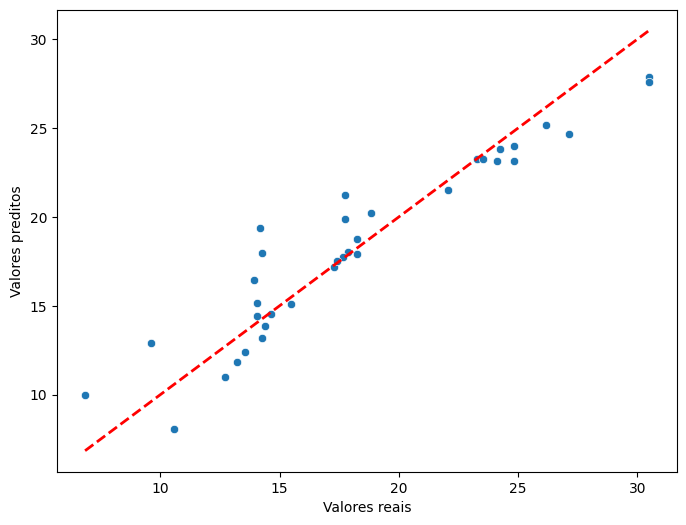

In [63]:
# Gráfico de dispersão (scatterplot) evidenciando o desempenho do modelo:

plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_pred)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Valores reais')
plt.ylabel('Valores preditos');

# Conclusões

Para fazer uma avaliação do impacto de diferentes estratégias de investimento em publicidade, realizei 3 predições simulando um investimento nos 3 canais.

O primeiro cenário é o mais parecido com a realidade: O canal Youtube recebeu o maior investimento, seguido pelo Newspaper e por último, Facebook, com o menor. O modelo indica um valor de Sales de 12.16 para essa estratégia de investimento.

O segundo cenário leva em consideração o valores do coeficiente de correlação obtidos na análise exploratória e o valor do coeficiente obtido no treinamento do modelo para o canal Facebook, sendo 0.6 e 0.17, respectivamente. Dessa forma, o segundo cenário simula o maior investimento para esse canal, seguido por Youtube que apresentou um coeficiente menor durante o treinamento e por último, Newspaper, com o menor coeficiente.
O modelo indica um retorno de 24.01 para Sales, sendo o dobro do resultado da predição anterior.

O ultimo cenário teve como objetivo explicitar o impacto que o canal Newspaper possui em Sales, portanto, ele recebeu o maior investimento, seguido por facebook e por fim, Youtube.
O modelo prevê um valor de 14.35 para Sales, indicando um retorno melhor do que a estratégia atual, porém ainda próximo.

Levando em consideração o valor de R² de 0.89, as predições do modelo apresentam uma confiabilidade razoavelmente alta. Sendo assim, após a análise dos dados, fica evidente que a alocação de maiores investimentos no canal Facebook leva a uma maior previsão de Sales, enquanto o investimento em Newspaper tende a se traduzir em uma previsão menor. Uma nova estratégia de investimento com um orçamento rebalanceado de acordo com o modelo de regressão indica que é válido diminuir o investimento em Newspaper e aumentar em Facebook, avaliando outros fatores para distribuir o novo orçamento entre esse canal e o canal Youtube.